In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
# Use matplotlib in notebook output
%matplotlib inline

In [3]:
df=pd.read_csv('/content/drive/MyDrive/pizza_customers.csv')

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
df.shape

(200, 5)

In [7]:
# Dropping CustomerID column
df.drop(['CustomerID'],axis='columns',inplace=True)

In [8]:
df.head()


,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
# Checking correlation between the numerical fields
df.corr()

<ipython-input-9-6758a41136be>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Annual Income (k$),Spending Score (1-100)
Age,1.000000,-0.012398,-0.327227
Annual Income (k$),-0.012398,1.000000,0.009903
Spending Score (1-100),-0.327227,0.009903,1.000000


In [10]:
#Getting dummy variable for the column Gender
df=pd.concat([df, pd.get_dummies(df['Gender'])], axis=1)


In [11]:
df.drop(['Male','Gender'],axis='columns',inplace=True)

In [12]:
#now all attributes have numerical values
df.head()

,Age,Annual Income (k$),Spending Score (1-100),Female
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,1
4,31,17,40,1


In [19]:
# converting the rows into list
df=df.values.tolist()

In [21]:
def random_centroids(all_vals, K):
    centroids = []
    #Place K centroids at random locations
    for i in range(K):
        centroid = all_vals[random.randint(0, 149)]
        centroids.append(centroid)
    return centroids

In [22]:
random_centroids(df,5)

[[44, 73, 7, 1],
 [68, 59, 55, 1],
 [23, 70, 29, 1],
 [67, 19, 14, 0],
 [35, 21, 35, 1]]

In [23]:
def assign_cluster(all_vals, centroids):
    assignments = []

    for data_point in all_vals:
        dist_point_clust = []

        for centroid in centroids:
            d_clust = np.linalg.norm(np.array(data_point) - np.array(centroid))
            dist_point_clust.append(d_clust)

        assignment =np.argmin(dist_point_clust)
        assignments.append(assignment)

    return assignments

In [24]:
assign_cluster(df,random_centroids(df,5))

[4,
 0,
 4,
 0,
 4,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 4,
 0,
 1,
 0,
 1,
 0,
 4,
 4,
 4,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 4,
 4,
 4,
 1,
 0,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 1,
 1,
 1,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 4,
 3,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 4,
 3,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3,
 1,
 3]

In [25]:
def new_centroids(all_vals, centroids, assignments, K):
    new_centroids = []
    for i in range(K):
        pt_cluster = []
        for x in range(len(all_vals)):
                if (assignments[x] == i):
                    pt_cluster.append(all_vals[x])
        mean_c = np.mean(pt_cluster, axis=0)
        new_centroids.append(mean_c)

    return new_centroids

In [26]:
def sse(all_vals, assignments, centroids):
    errors = []

    for i in range(len(all_vals)):
        #get assigned centroid for each point
        centroid = centroids[assignments[i]]

        #compute the distance (error) between one point and its closest centroid
        error = np.linalg.norm(np.array(all_vals[i]) - np.array(centroid))

        #append squared error to the list of error
        errors.append(error**2)

    #and sum up all the errors
    sse = sum(errors)

    return sse

In [27]:
def kmeans_clustering(all_vals,K,max_iter = 100, tol = pow(10,-3) ):
    it = -1
    all_sse = []
    assignments = []

    #Place K centroids at random locations
    centroids = random_centroids(all_vals, K)

    #Until algorithm converges (needs two iterations before comparing the errors)
    while (len(all_sse)<=1 or (it < max_iter and np.absolute(all_sse[it] - all_sse[it-1])/all_sse[it-1] >= tol)):
        it += 1
        #Assign all data points to the closest center
        assignments = assign_cluster(all_vals, centroids)

        #Compute the new centroids
        centroids = new_centroids(all_vals, centroids, assignments, K)

        #Compute SSE
        for i in range(1,11):
            sse_kmeans = sse(all_vals, assignments, centroids)
            all_sse.append(sse_kmeans)

            plt.figure(figsize=(12,6))
            plt.plot(range(1,11),sse)
            plt.plot(range(1,11),sse, linewidth=2, color="red", marker ="8")
            plt.xlabel("K Value")
            plt.xticks(np.arange(1,11,1))
            plt.ylabel("SSE")
            plt.show()
    return (assignments, centroids, all_sse, it+1)

ValueError: ignored

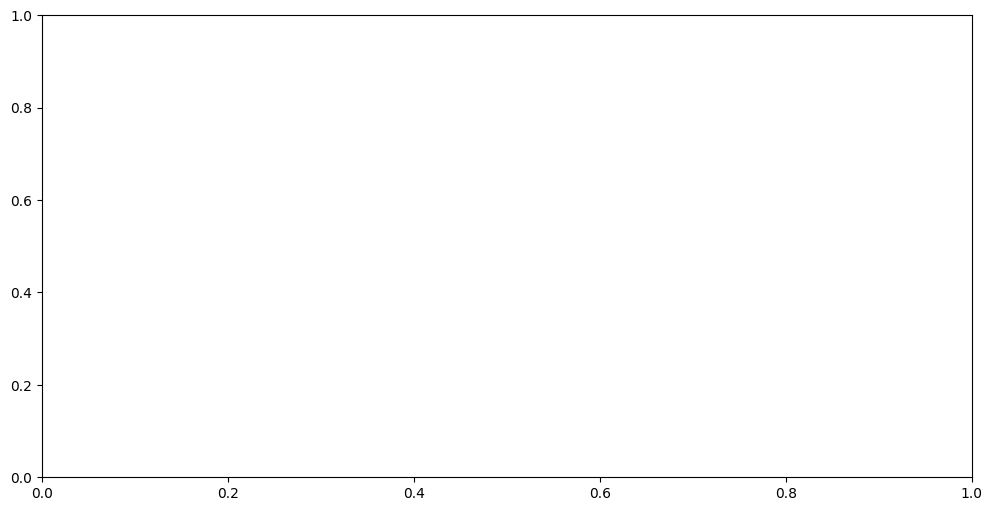

In [28]:
kmeans_clustering(df,K=10)

Generating dummy data for customer location

In [35]:

pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.3 MB/s eta 0:00:00


In [33]:
from faker import Faker
fake = Faker()

ModuleNotFoundError: ignored

In [ ]:
fake.name()
fake.current_location()

AttributeError: ignored

In [ ]:
profileData = [fake.profile() for i in range(100)]
df1 = pd.DataFrame(profileData)
df1

,job,company,ssn,residence,current_location,blood_group,website,username,name,sex,address,mail,birthdate
0,Economist,"Rice, Smith and Gray",100-91-4695,"19911 Donna Vista\nPort Georgeland, CA 14694","(7.242754, -12.303727)",A+,"[http://www.sullivan.com/, http://powell.biz/,...",nicoleward,Jerome Brooks,M,"51016 Cortez Vista Suite 464\nEast Dawn, GA 92798",melissa65@gmail.com,2022-02-06
1,"Embryologist, clinical",Short and Sons,669-39-1541,"4042 Michael Pines Suite 824\nHayestown, AZ 64043","(-82.136615, -114.910537)",O+,[http://www.marsh.com/],malonesharon,Michael Bowen,M,"353 Nguyen Pines Apt. 421\nWest Justinmouth, L...",twoods@yahoo.com,1951-11-26
2,Hydrologist,"Holland, Robinson and Williams",239-91-6892,"362 Scott Port Suite 417\nSmithhaven, VT 51506","(-16.4032145, -142.305936)",A+,[http://www.smith.com/],baileythomas,Thomas Jenkins,M,USS Spencer\nFPO AE 41084,vanessapratt@gmail.com,1939-04-12
3,Advertising account executive,Long-Sellers,525-27-1912,"2535 Silva Point\nNew Louis, IL 05225","(31.2029645, -165.042333)",AB+,"[https://jackson.com/, http://www.rojas.biz/, ...",travis46,Kelli Lewis,F,"169 Charles Green Apt. 078\nJoshuamouth, VA 24122",marcus76@gmail.com,2019-02-25
4,Web designer,Wilcox-Barber,030-34-2819,"1628 Jason Keys\nWest Brent, MT 64629","(-2.018601, 25.445655)",AB-,"[http://www.smith.com/, https://lyons.com/, ht...",curtisjason,Andrew Hines,M,"PSC 4754, Box 2670\nAPO AP 53420",amydeleon@hotmail.com,1949-12-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Hydrologist,Hill-Ryan,146-09-5202,"3468 Michael Squares\nLaurabury, RI 88213","(-71.0069795, 35.954537)",O+,[https://gould.info/],patriciahensley,Patricia Brown,F,"4716 Lauren Trail Apt. 232\nJamesside, MN 00662",hsmith@yahoo.com,2013-09-30
96,Economist,Torres PLC,531-37-3985,"703 Kelly Turnpike\nNew Robert, AR 71528","(14.146519, -148.370234)",B+,"[http://www.wilson-roberts.com/, https://www.g...",amcdowell,Joshua Gentry,M,"4146 Henry Drive Apt. 405\nDeborahport, TN 90543",christine66@gmail.com,1950-08-12
97,Photographer,Thomas Inc,345-89-8384,"154 Lopez Points Apt. 799\nWilliamsfort, RI 36037","(-14.965438, 95.943117)",A+,"[http://burton.com/, https://brown-irwin.biz/,...",amyers,Joseph Duran,M,"PSC 4122, Box 0772\nAPO AA 90975",julia99@gmail.com,2016-05-02
98,"Biochemist, clinical","Sanchez, Phelps and Weber",894-86-0990,"PSC 8891, Box 6155\nAPO AA 96047","(-9.1444575, -33.610910)",B-,"[https://hall-bird.net/, http://baker.biz/, ht...",travis78,Diana Long,F,"878 Sarah Forge Suite 219\nKramerview, GU 51640",nicholas93@yahoo.com,1946-07-11
